### Data Explorer -> targets

- Find out sentence count
- Divide train, validation and test set
- Find out individual tags as array
- Find max length or word in sentence
- Find index, start, end of entity from sentence

### For installing seaborn
conda install seaborn -c conda-forge

### For installing tensorflow in Macos follow the link
https://developer.apple.com/metal/tensorflow-plugin/

### For downloading the model use following command
python -m spacy download en_core_web_lg

### Open tensorboard
tensorboard --logdir=log/train

In [2]:
from src.utils import Constants
import numpy as np

In [5]:
# noinspection PyShadowingNames
def getSentenceArray(dataFile: str):
    sentence_array = []
    with open(dataFile, encoding='utf-8') as f:
        # Initialize variables
        current_sent_array = []

        for line in f:
            if line.startswith(Constants.ID_IDENTIFIER):
                if len(current_sent_array) > 0:
                    sentence_array.append(current_sent_array)
                    current_sent_array = []
            elif line.strip() == "":
                pass
            else:
                # Split the line into its constituent parts
                parts = line.strip().split(Constants.SEPERATOR)
                # Get the word and label for this token
                word = parts[0]
                current_sent_array.append(word)

        # If there are any tokens left in the current sentence, add it to the list of sentences
        if len(current_sent_array) > 0:
            sentence_array.append(current_sent_array)

    return sentence_array

In [6]:
# Get sentence count for train
train_sentence_array = getSentenceArray("../data/en-train.conll")
print("Sentences available in train dataset is:", len(train_sentence_array))

# Get sentence count for dev
dev_sentence_array = getSentenceArray("../data/en-dev.conll")
print("Sentences available in dev dataset is:", len(dev_sentence_array))

Sentences available in train dataset is: 16778
Sentences available in dev dataset is: 871


In [7]:
# Combining both array
sentence_array = train_sentence_array + dev_sentence_array
print("Total sentence available is:", len(sentence_array))

Total sentence available is: 17649


In [24]:
# Split into train-70%, validation-20%, test-10%
def splitArrayIntoTrainValTest(dataArray):
    # Calculate the indices to split the array
    n = len(dataArray)
    train_idx = int(0.7 * n)
    val_idx = int(0.9 * n)

    # Split the array into three parts
    train_arr = dataArray[:train_idx]
    val_arr = dataArray[train_idx:val_idx]
    test_arr = dataArray[val_idx:]

    return train_arr, val_arr, test_arr


train, val, test = splitArrayIntoTrainValTest(sentence_array)
print("Train sentence count is:", len(train))
print("Validation sentence count is:", len(val))
print("Test sentence count is:", len(test))

['robert', 'gottschalk', '1939', 'academy', 'award', 'winner', 'and', 'founder', 'of', 'panavision']
Train sentence count is: 12354
Validation sentence count is: 3530
Test sentence count is: 1765


In [9]:
# Find max length of word
# noinspection PyShadowingNames
def max_array_length(arrays):
    length_array = []
    max_length = 0
    for arr in arrays:
        length = len(arr)
        length_array.append(length)
        if length > max_length:
            max_length = length
    return max_length, length_array


max_length, length_array = max_array_length(sentence_array)
print("Max count of words in one sentence is:", max_length)

np_length_array = np.array(length_array)
mean = np.mean(np_length_array)
print("Mean:", mean)

std = np.std(np_length_array)
print("Standard deviation:", std)

Max count of words in one sentence is: 68
Mean: 15.09060003399626
Standard deviation: 5.287561377169507


In [10]:
import math

considered_word_count = math.ceil(mean + 3 * std)
print("Considered word length is:", considered_word_count)

Considered word length is: 31


In [12]:
# noinspection PyShadowingNames
# Get all labels as an array
def getLabelArray(dataFile: str, onlyBioTagging=False):
    label_array = []
    with open(dataFile, encoding='utf-8') as f:
        for line in f:
            if line.startswith(Constants.ID_IDENTIFIER):
                pass
            elif line.strip() == "":
                pass
            else:
                # Split the line into its constituent parts
                parts = line.strip().split(Constants.SEPERATOR)
                # Get the word and label for this token
                label = parts[-1]
                if onlyBioTagging:
                    bio_parts = label.strip().split(Constants.BIOX_SEPERATOR)
                    only_bio_tag = bio_parts[0]
                    label_array.append(only_bio_tag)
                else:
                    label_array.append(label)
    return label_array


# Get label array for train
train_label_array = getLabelArray("../data/en-train.conll")
dev_label_array = getLabelArray("../data/en-dev.conll")

label_array = train_label_array + dev_label_array
label_set = set(label_array)

print("label set is:", label_set, "Unique label count is:", len(label_set))

label set is: {'I-HumanSettlement', 'I-Medication/Vaccine', 'B-PrivateCorp', 'B-Drink', 'B-Artist', 'I-Artist', 'I-Scientist', 'B-OtherPER', 'I-Drink', 'I-Cleric', 'B-OtherLOC', 'I-Vehicle', 'I-MedicalProcedure', 'B-HumanSettlement', 'B-Software', 'B-SportsGRP', 'B-MusicalGRP', 'B-Station', 'B-VisualWork', 'B-CarManufacturer', 'I-Symptom', 'I-AerospaceManufacturer', 'I-OtherPER', 'I-Disease', 'I-OtherLOC', 'B-Clothing', 'B-MedicalProcedure', 'B-AnatomicalStructure', 'I-AnatomicalStructure', 'I-MusicalWork', 'I-SportsGRP', 'B-Politician', 'B-OtherPROD', 'B-ArtWork', 'I-Station', 'I-VisualWork', 'I-OtherPROD', 'B-Medication/Vaccine', 'I-Clothing', 'B-WrittenWork', 'O', 'I-PrivateCorp', 'B-Cleric', 'I-PublicCorp', 'B-Food', 'I-WrittenWork', 'I-Facility', 'I-Software', 'B-Athlete', 'B-Scientist', 'B-AerospaceManufacturer', 'B-Symptom', 'B-Facility', 'B-PublicCorp', 'I-ORG', 'I-Food', 'B-Disease', 'I-Politician', 'I-SportsManager', 'B-SportsManager', 'I-ArtWork', 'B-MusicalWork', 'B-Vehicle

In [13]:
# noinspection PyShadowingNames
def count_each_label(label_array, label_set):
    result_dict = {}

    for item in label_set:
        result_dict[item] = label_array.count(item)

    return result_dict

{'I-HumanSettlement': 1311, 'I-Medication/Vaccine': 95, 'B-PrivateCorp': 212, 'B-Drink': 223, 'B-Artist': 3925, 'I-Artist': 4060, 'I-Scientist': 407, 'B-OtherPER': 1868, 'I-Drink': 86, 'I-Cleric': 411, 'B-OtherLOC': 307, 'I-Vehicle': 325, 'I-MedicalProcedure': 159, 'B-HumanSettlement': 2726, 'B-Software': 619, 'B-SportsGRP': 857, 'B-MusicalGRP': 862, 'B-Station': 412, 'B-VisualWork': 1327, 'B-CarManufacturer': 262, 'I-Symptom': 111, 'I-AerospaceManufacturer': 185, 'I-OtherPER': 2383, 'I-Disease': 305, 'I-OtherLOC': 627, 'B-Clothing': 208, 'B-MedicalProcedure': 255, 'B-AnatomicalStructure': 405, 'I-AnatomicalStructure': 152, 'I-MusicalWork': 1921, 'I-SportsGRP': 1171, 'B-Politician': 1103, 'B-OtherPROD': 835, 'B-ArtWork': 212, 'I-Station': 633, 'I-VisualWork': 2403, 'I-OtherPROD': 613, 'B-Medication/Vaccine': 373, 'I-Clothing': 89, 'B-WrittenWork': 1127, 'O': 209544, 'I-PrivateCorp': 180, 'B-Cleric': 314, 'I-PublicCorp': 323, 'B-Food': 381, 'I-WrittenWork': 1942, 'I-Facility': 1642, 'I-

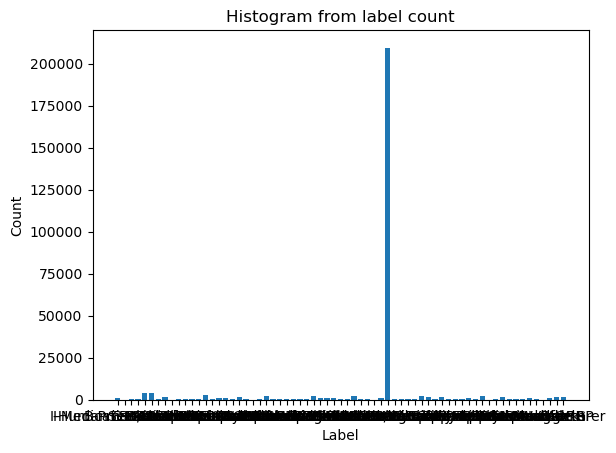

In [14]:
import matplotlib.pyplot as plt


def drawHistogramFromDictionary(label_dict):
    plt.bar(label_dict.keys(), label_dict.values())
    plt.title("Histogram from label count")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()


# Generate data
label_dict = count_each_label(label_array, label_set)
print(label_dict)
drawHistogramFromDictionary(label_dict)

{'O': 209544, 'I': 30045, 'B': 26745}


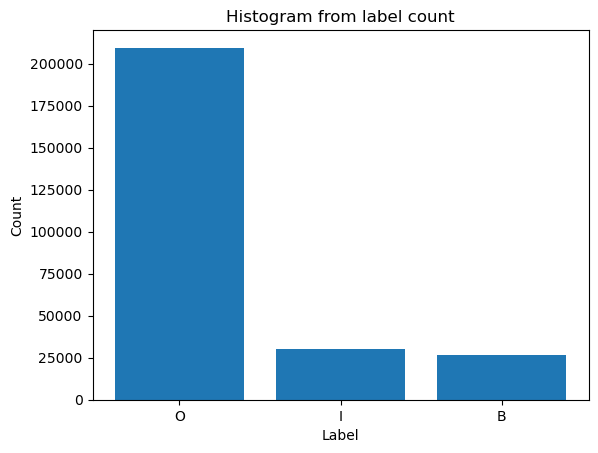

In [15]:
# Get count for only BIO tags
train_bio_label_array = getLabelArray("../data/en-train.conll", onlyBioTagging=True)
dev_bio_label_array = getLabelArray("../data/en-dev.conll", onlyBioTagging=True)

label_bio_array = train_bio_label_array + dev_bio_label_array
label_bio_set = set(label_bio_array)
label_bio_dict = count_each_label(label_bio_array, label_bio_set)
print(label_bio_dict)
drawHistogramFromDictionary(label_bio_dict)

### New task
1. Convert sentence map

In [18]:
from src.utils import Constants

def getDataArrayAsMap(dataFile: str, onlyBioTagging=False):
    # Open the CoNLL file
    data_array = []
    with open(dataFile, encoding='utf-8') as f:
        # Initialize variables
        current_sent_dictionary = {}

        for line in f:
            if line.startswith(Constants.ID_IDENTIFIER):
                if len(current_sent_dictionary) > 0:
                    data_array.append(current_sent_dictionary)
                    current_sent_dictionary = {}
            elif line.strip() == "":
                pass
            else:
                # Split the line into its constituent parts
                parts = line.strip().split(Constants.SEPERATOR)
                # Get the word and label for this token
                word = parts[0]
                label = parts[-1]
                if onlyBioTagging:
                    bio_parts = label.strip().split(Constants.BIOX_SEPERATOR)
                    only_bio_tag = bio_parts[0]
                    current_sent_dictionary[word] = only_bio_tag
                else:
                    current_sent_dictionary[word] = label

        # If there are any tokens left in the current sentence, add it to the list of sentences
        if len(current_sent_dictionary) > 0:
            data_array.append(current_sent_dictionary)

    return data_array


train_map_array = getDataArrayAsMap("../data/en-train.conll")
item_one = train_map_array[0]
item_one_key = list(item_one.keys())
item_one_value = list(item_one.values())
print(item_one)

{'robert': 'B-OtherPER', 'gottschalk': 'I-OtherPER', '1939': 'O', 'academy': 'B-VisualWork', 'award': 'I-VisualWork', 'winner': 'O', 'and': 'O', 'founder': 'O', 'of': 'O', 'panavision': 'B-ORG'}


In [19]:
def split_label_text(text):
    parts = text.split("-")
    return parts[0], "-" + parts[1]

print(split_label_text('B-Software'))

('B', '-Software')


In [20]:
def make_sentence(words):
    sentence = " ".join(words)
    return sentence

print(make_sentence(item_one_key))

robert gottschalk 1939 academy award winner and founder of panavision


In [21]:
def format_ner_results(results):
    sentence = ""
    entities = []
    start = 0
    for word, label in results.items():
        if label != "O":
            entities.append((start, len(sentence) + len(word), label))
        sentence += word + " "
        start = len(sentence)
    return {"sentence": sentence.strip(), "entities": entities}


formatted_data = format_ner_results(item_one)
print(formatted_data)

{'sentence': 'robert gottschalk 1939 academy award winner and founder of panavision', 'entities': [(0, 6, 'B-OtherPER'), (7, 17, 'I-OtherPER'), (23, 30, 'B-VisualWork'), (31, 36, 'I-VisualWork'), (59, 69, 'B-ORG')]}


In [22]:
print(formatted_data["sentence"][59:69])

panavision
